# Exercise 03 : Bar charts


Peak hour (working days): 21
Peak hour (weekend): 11


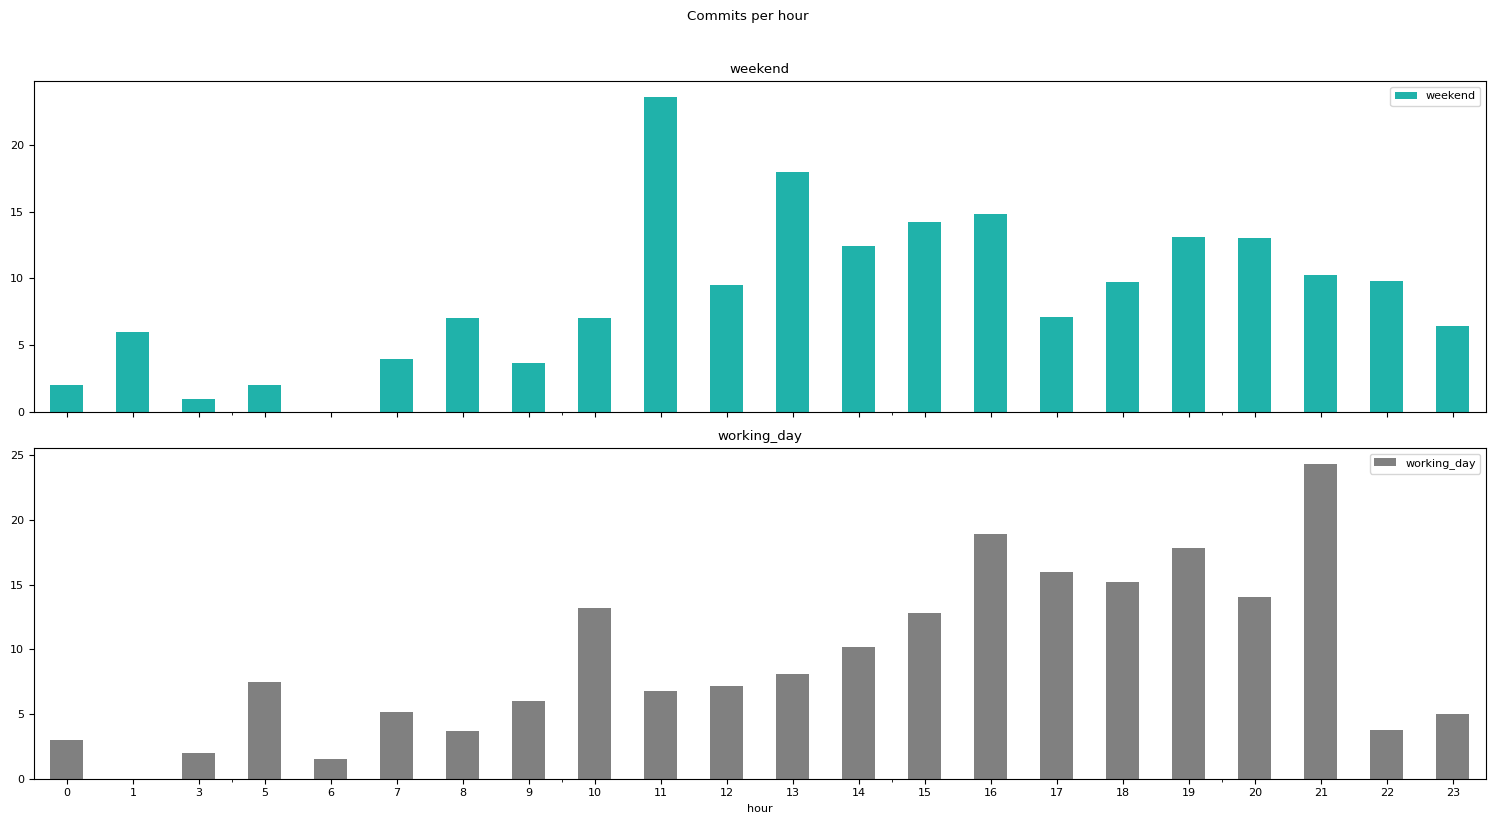

In [14]:
import pandas as pd
import sqlite3

con = sqlite3.connect(r"../data/checking-logs.sqlite")

checker = pd.read_sql("""
SELECT uid, timestamp, 1 as commits 
FROM checker 
WHERE uid LIKE 'user_%'
""", con, parse_dates=['timestamp'])

checker['date'] = checker['timestamp'].dt.date
checker['hour'] = checker['timestamp'].dt.hour
checker['weekday'] = checker['timestamp'].dt.dayofweek
checker['day_type'] = checker['weekday'].apply(lambda x: 'weekend' if x >= 5 else 'working_day')

per_date_hour = checker.groupby(['day_type', 'date', 'hour'])['commits'].count().reset_index()
avg_per_hour = per_date_hour.groupby(['day_type', 'hour'])['commits'].mean().unstack('day_type')

plot = avg_per_hour.plot(
    kind='bar',
    subplots=True,
    layout=(2, 1),
    figsize=(15, 8),
    color=['lightseagreen', 'gray'],
    sharex=True,
    title=['weekend', 'working_day'],
    fontsize=8,
    rot=0
)

plot[0][0].get_figure().suptitle('Commits per hour', y=1.02)
plot[0][0].get_figure().tight_layout()

# questions
peak_working = avg_per_hour['working_day'].idxmax()
peak_weekend = avg_per_hour['weekend'].idxmax()
print(f"\nPeak hour (working days): {peak_working}")
print(f"Peak hour (weekend): {peak_weekend}")

con.close()

**Is the dynamic different on working days and weekends?**  
Peak hour on working days: **21**.  
Peak hour on weekends: **11**.
